In [75]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from math import pi
from math import e
from numpy import sin
from numpy import cos
from cmath import sqrt
from scipy import special
from numpy import exp
from scipy import optimize
from numpy import log
from numpy import tanh
from scipy.optimize import fsolve
from scipy.optimize import brentq
from numpy import conj
from numpy import cosh

In [282]:
steps = 100
w_list = np.linspace(-8.0, 8.0, num=steps)
T_list = np.linspace(0.001, 2.0, num=steps)
n_list = np.linspace(-1000, 1000, num=steps)

In [283]:
def G_R(n,sigma,U,T):
    result = 0.000001
    matsubara = 1j * T * pi * (2*n+1)
    factor = matsubara + U/2 - sigma
    result_positive = factor / 2 + 0.5 * sqrt(factor ** 2 - 4)
    #print(result_positive)
    result_negative = factor / 2 - 0.5 * sqrt(factor ** 2 - 4)
    #print(result_negative)
    if result_positive.imag < 0 and matsubara.imag > 0:
        result = result_positive
    if result_positive.imag > 0 and matsubara.imag < 0:
        result = result_positive
    if result_negative.imag < 0 and matsubara.imag > 0:
        result = result_negative
    if result_negative.imag > 0 and matsubara.imag < 0:
        result = result_negative
    return result

def G_0(n,sigma,U,T):
    return 1 / (1/G_R(n,sigma,U,T) + sigma)

def G_new(n,sigma,U,T):
    return 0.5 * G_0(n,sigma,U,T) + 0.5 * 1/(1/G_0(n,sigma,U,T) - U)

In [284]:
def get_gf(n,U,T):
    tol = 10
    sigma_temp = 0.0
    old_sigma = sigma_temp
    retarded = G_R(n, sigma_temp, U, T)
    #print(retarded)
    nonint = 1/(1/retarded + old_sigma)
    new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
    new_sigma = 1 / nonint - 1 / new
    
    for i in range(convergence):
        old_sigma = new_sigma
        retarded = G_R(n, old_sigma, U, T)
        #print(w_list[i],retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
        new_sigma = 1 / nonint - 1 / new
    #sigma_list.append(new_sigma)
    #print('Sigma = ',sigma_list[i])
    retarded = G_R(n, new_sigma, U, T)
    return retarded

def get_sigma(n,U,T):
    tol = 10
    sigma_temp = 0.0
    old_sigma = sigma_temp
    retarded = G_R(n, sigma_temp, U, T)
    #print(retarded)
    nonint = 1/(1/retarded + old_sigma)
    new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
    new_sigma = 1 / nonint - 1 / new
    
    for i in range(convergence):
        old_sigma = new_sigma
        retarded = G_R(n, old_sigma, U, T)
        #print(w_list[i],retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
        new_sigma = 1 / nonint - 1 / new
    #sigma_list.append(new_sigma)
    #print('Sigma = ',sigma_list[i])
    retarded = G_R(n, new_sigma, U, T)
    return new_sigma

def get_lambda(n,U,T):
    tol = 10
    sigma_temp = 0.0
    old_sigma = sigma_temp
    retarded = G_R(n, sigma_temp, U, T)
    #print(retarded)
    nonint = 1/(1/retarded + old_sigma)
    new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
    new_sigma = 1 / nonint - 1 / new
    
    for i in range(convergence):
        old_sigma = new_sigma
        retarded = G_R(n, old_sigma, U, T)
        #print(w_list[i],retarded)
        nonint = 1/(1/retarded + old_sigma)
        new = 0.5 * nonint + 0.5 * 1/(1/nonint - U)
        new_sigma = 1 / nonint - 1 / new
    #sigma_list.append(new_sigma)
    #print('Sigma = ',sigma_list[i])
    retarded = G_R(n, new_sigma, U, T)
    lambda_n = 1j*T*pi*(2*n+1) + U/2 - new_sigma - 1/(retarded)
    return lambda_n

def condition(T, U_temp):
    sum_value = 0
    n_start = n_list[0]
    n_end = n_list[-1]
    n_interval = (n_end - n_start) / steps
    n_temp = n_start
    for i in range(len(n_list)):
        first_part = 1 + get_gf(n_temp,U_temp,T) * get_sigma(n_temp,U_temp,T)
        second_part = 1 + get_gf(n_temp,U_temp,T) * (get_sigma(n_temp,U_temp,T) - U_temp)
        third_part = 1 + get_gf(n_temp,U_temp,T) * (get_sigma(n_temp,U_temp,T) - U_temp/2) + get_gf(n_temp,U_temp,T) * get_lambda(n_temp,U_temp,T) * (1+get_gf(n_temp,U_temp,T)*(2*get_sigma(n_temp,U_temp,T)-U_temp))
        sum_value += (get_gf(n_temp,U_temp,T))**3 * get_lambda(n_temp,U_temp,T) / (first_part * second_part * third_part)
        n_temp += n_interval
    return (sum_value * (U_temp**2) / 4 - 1).real

In [285]:
U_list = np.linspace(0,25, num=100)

T_c_list = []

U_new_list = []
for i in range(len(U_list)):
    if U_list[i] < 15:
        convergence = 50
    else:
        convergence = 500
    U_temp = U_list[i]
    T_c_list.append(20 * brentq(condition, 0, 0.1, args=U_temp))
    print(U_temp,' ',T_c_list[i])
    U_new_list.append(U_list[i]/(U_list[i]+1))

C:\Users\luoge\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in cdouble_scalars
C:\Users\luoge\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in cdouble_scalars
C:\Users\luoge\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in cdouble_scalars


0.0   0.0
0.25252525252525254   0.01630373725480899
0.5050505050505051   0.038035194674458775
0.7575757575757576   0.05796304026985767
1.0101010101010102   0.07527253560409265
1.2626262626262628   0.0900010914741666
1.5151515151515151   0.1023229654639077
1.7676767676767677   0.11234007499787663
2.0202020202020203   0.11932287188971497
2.272727272727273   0.11958971627613108
2.5252525252525255   0.11758011947156526
2.777777777777778   0.11504736738131545
3.0303030303030303   0.11212335487450174
3.282828282828283   0.10889903389946018
3.5353535353535355   0.10547615058709799
3.787878787878788   0.1019554845252475
4.040404040404041   0.0984231465110752
4.292929292929293   0.09494407159590693
4.545454545454546   0.09156240033414739
4.7979797979797985   0.088305358497109
5.050505050505051   0.08518785818889249
5.303030303030304   0.08221630646882873
5.555555555555556   0.07939150727210079
5.808080808080809   0.07671059141402886
6.0606060606060606   0.07416861204193886
6.313131313131313   0

KeyboardInterrupt: 

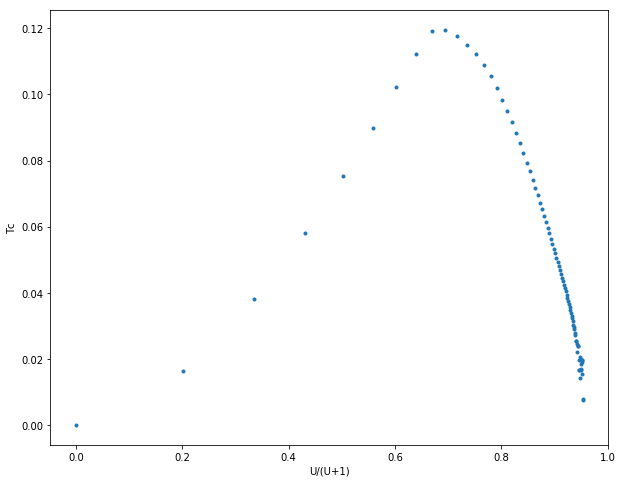

In [287]:
plt.figure(figsize = (10, 8))
plt.ylabel('Tc')
plt.xlabel('U/(U+1)')
plt.plot(U_new_list, T_c_list, '.')
plt.show()